In [1]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import tester
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

import pytorch_drl.models.actor_critic_models as models

from pytorch_drl.algs.trpo import TRPO

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


## 1. Define Utils:

### 1.1 Plotting:

In [3]:
def mean_filter(arr, filter_len):
    arr = np.concatenate([[arr[0]]*(filter_len-1), arr])
    filter_arr = np.ones(filter_len)/filter_len
    arr = arr
    output = list()
    for i in range(filter_len-1, len(arr)):
        conv = np.sum(filter_arr * arr[i-filter_len+1:i+1])
        output.append(conv)
    return output

def plot(scores, n=None):
    if n is not None:
        scores = mean_filter(scores, n)
    clear_output(True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()

## 2. Create environment

In [4]:
env_name = "LunarLander-v2"
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

State size: 4 
Action size: 2


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## 3. TRPO Test

Avg score: 195.03 i: 508                       Solved! Episode 508


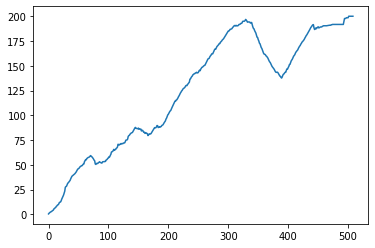

In [19]:
tmax = 200
n_episodes = 2000
n_env = 1

actor_net = models.ActorNetwork(state_size, action_size, env.action_space)
critic_net = models.CriticNetwork(state_size, action_size)


agent = TRPO(actor_net,
             critic_net,
             critic_lr=1e-3,
             max_kl=1e-2,
             backtrack_alpha=0.5,
             backtrack_steps=10,
             damping_coeff=0.1,
             env_id=env_name,
             gamma=0.99, 
             tau=0.95,
             n_env=n_env,
             device=device,
             max_grad_norm=0.5,
            )

max_score = 195.
model_name = "trpo_{}".format(env_name)
# train the agent
scores, losses = agent.train(tmax, n_episodes,  env, max_score, model_name)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
plt.plot(x, scores, label = "scores")
plt.show()


### 4.1 Trained Agent Demonstration

In [20]:
agent.test(env, render=True, n_times=4)

200.0
200.0
200.0
200.0


200.0